In [1]:
%matplotlib inline
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import sys
sys.path.append('/Users/gbromley/Dropbox/code/python_utilities/')
from python_data_functions import extract_months
from matplotlib.offsetbox import AnchoredText
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature
from mpl_toolkits.axes_grid.anchored_artists import AnchoredText

/Users/gbromley/anaconda/envs/paper1_research/lib/python3.6/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  del sys.path[0]


In [3]:
### data sources ###
data_dir = '/Users/gbromley/data/wrf_output/'
precip_fallow = xr.open_dataset(data_dir+'modland/PRECIP_fallow_mon.nc')
precip_non_fallow =  xr.open_dataset(data_dir+'test/PRECIP_nonfallow_mon.nc')

season = 'MJ'
mj=[5,6]
ext_e = -92
ext_w = -120
ext_n = 55
ext_s = 38

In [4]:
precip_fallow_test = ((precip_fallow['RAINC']+ precip_fallow['I_RAINC']*1000.0))

precip_non_fallow_test = ((precip_non_fallow['RAINC']+ precip_non_fallow['I_RAINC']*1000.0))

In [5]:
diff = np.empty(shape=(12,174,224))

In [6]:
months = [1,2,3,4,5,6,7,8,9,10,11]
diff[0] = (precip_non_fallow_test.isel(XTIME=0))/(precip_fallow_test.isel(XTIME=0))
for month in months:
        diff[month] =  (precip_non_fallow_test.isel(XTIME=month) - precip_non_fallow_test.isel(XTIME=(month-1)))/(precip_fallow_test.isel(XTIME=month) - precip_fallow_test.isel(XTIME=(month-1)))


In [7]:
test = precip_fallow_test.copy(deep=True)
test.values = diff

In [8]:
test

<xarray.DataArray (XTIME: 12, south_north: 174, west_east: 224)>
array([[[ 1.26918681e+00,  1.89810356e+00,  1.24562023e+00, ...,
          1.12241454e+00,  1.16814760e+00,  1.08523111e+00],
        [ 8.75837417e-01,  1.47723307e+00,  1.29210484e+00, ...,
          1.14908435e+00,  1.16685330e+00,  1.16227185e+00],
        [ 8.02126121e-01,  1.35557789e+00,  1.49364965e+00, ...,
          1.17925020e+00,  1.12811403e+00,  1.13568021e+00],
        ...,
        [ 1.36762207e+00,  1.00333191e+00,  3.12231074e+00, ...,
          1.46891754e+00,  1.42790621e+00,  1.22638185e+00],
        [ 1.10407241e+00,  2.19861908e+00,  3.41307117e+00, ...,
          1.37436188e+00,  1.31572595e+00,  1.32809617e+00],
        [ 1.02069202e+00,  2.67189427e+00,  2.79241475e+00, ...,
          1.44092470e+00,  1.34215187e+00,  1.35090541e+00]],

       [[ 1.18111926e+00,  1.87691897e+00,  1.18393713e+00, ...,
          1.09458510e+00,  1.11530085e+00,  1.09080302e+00],
        [ 1.02518283e+00,  1.36710040e+00,  1.23211243e+00, ...,
          1.15032018e+00,  1.15598512e+00,  1.15571666e+00],
        [ 9.27870948e-01,  1.36312059e+00,  1.24965019e+00, ...,
          1.19892331e+00,  1.12796660e+00,  1.17608008e+00],
        ...,
        [ 1.06871801e+00,  8.89225998e-01,  1.58128627e+00, ...,
          1.47100819e+00,  1.41208031e+00,  1.20383731e+00],
        [ 1.41675872e+00,  1.54121999e+00,  1.98732428e+00, ...,
          1.37886896e+00,  1.32221343e+00,  1.32903129e+00],
        [ 6.50220894e-01,  2.06615076e+00,  1.97063492e+00, ...,
          1.44775831e+00,  1.35857109e+00,  1.37358913e+00]],

       [[ 1.36173705e+00,  1.62621585e+00,  1.16789833e+00, ...,
          1.55738572e+00,  1.45796842e+00,  1.54096187e+00],
        [ 1.57624677e+00,  1.44278914e+00,  1.16458661e+00, ...,
          1.49633629e+00,  1.47055807e+00,  1.50600288e+00],
        [ 1.38209777e+00,  1.51415802e+00,  1.04570935e+00, ...,
          1.36437755e+00,  1.40634261e+00,  1.56315572e+00],
        ...,
        [ 2.55776747e+00,  6.52011270e-01,  2.50975329e+00, ...,
                     nan,             nan,             nan],
        [ 9.97804272e-01,  1.47601562e+00,  1.49398310e+00, ...,
                     nan,             nan,             nan],
        [ 1.00128447e+00,  1.06965719e+00,  1.77855794e+00, ...,
                     nan,             nan,             nan]],

       ...,

       [[ 1.32399851e+00,  1.03998582e+00,  1.03842269e+00, ...,
          8.14700090e-02,  1.76889950e-01,  1.85250175e-01],
        [ 1.12982076e+00,  1.38550963e+00,  1.27263382e+00, ...,
         -9.81933873e+00,  4.98898081e+03,  1.83984614e-01],
        [ 1.21300745e+00,  1.27658070e+00,  1.20779732e+00, ...,
         -1.94384821e+02, -3.79410538e+01,  9.72678486e-02],
        ...,
        [ 1.33516567e+00,  1.13358468e+00,  1.49159936e+00, ...,
          1.50026142e+00,  1.51214216e+00,  1.46215959e+00],
        [ 1.23297977e+00,  1.33381405e+00,  1.50116350e+00, ...,
          1.61110895e+00,  1.67783979e+00,  1.71339202e+00],
        [ 1.13255372e+00,  1.23419626e+00,  1.76795900e+00, ...,
          1.44153066e+00,  1.44723599e+00,  1.48479662e+00]],

       [[ 1.34739317e+00,  1.04164334e+00,  1.00751833e+00, ...,
          1.49928978e+00,  1.61484822e+00,  2.55878692e+00],
        [ 1.13369982e+00,  1.28314471e+00,  1.08931500e+00, ...,
          7.40434423e-01,  4.91206602e-01,  2.27836357e+00],
        [ 1.20195773e+00,  1.23651854e+00,  1.11997800e+00, ...,
          1.16837106e+00,  1.46919686e+00,  1.55536564e+00],
        ...,
        [ 1.05369973e+00,  1.04319748e+00,  1.71203185e+00, ...,
          1.50129728e+00,  1.41737718e+00,  1.37014355e+00],
        [ 1.22048965e+00,  1.54756914e+00,  1.71552014e+00, ...,
          1.63273109e+00,  1.57399989e+00,  1.43574261e+00],
        [ 1.19589976e+00,  1.49489584e+00,  1.53639241e+00, ...,
          1.56267320e+00,  1.41277700e+00,  1.44180925e+00]],

       [[ 1.70968795e+00,  1.01911903e+00,  9.14576880e-01, ...,
  

In [9]:
diff_mj = test.sel(XTIME=extract_months(test['XTIME.month'], months[0],months[-1])).mean(dim='XTIME')

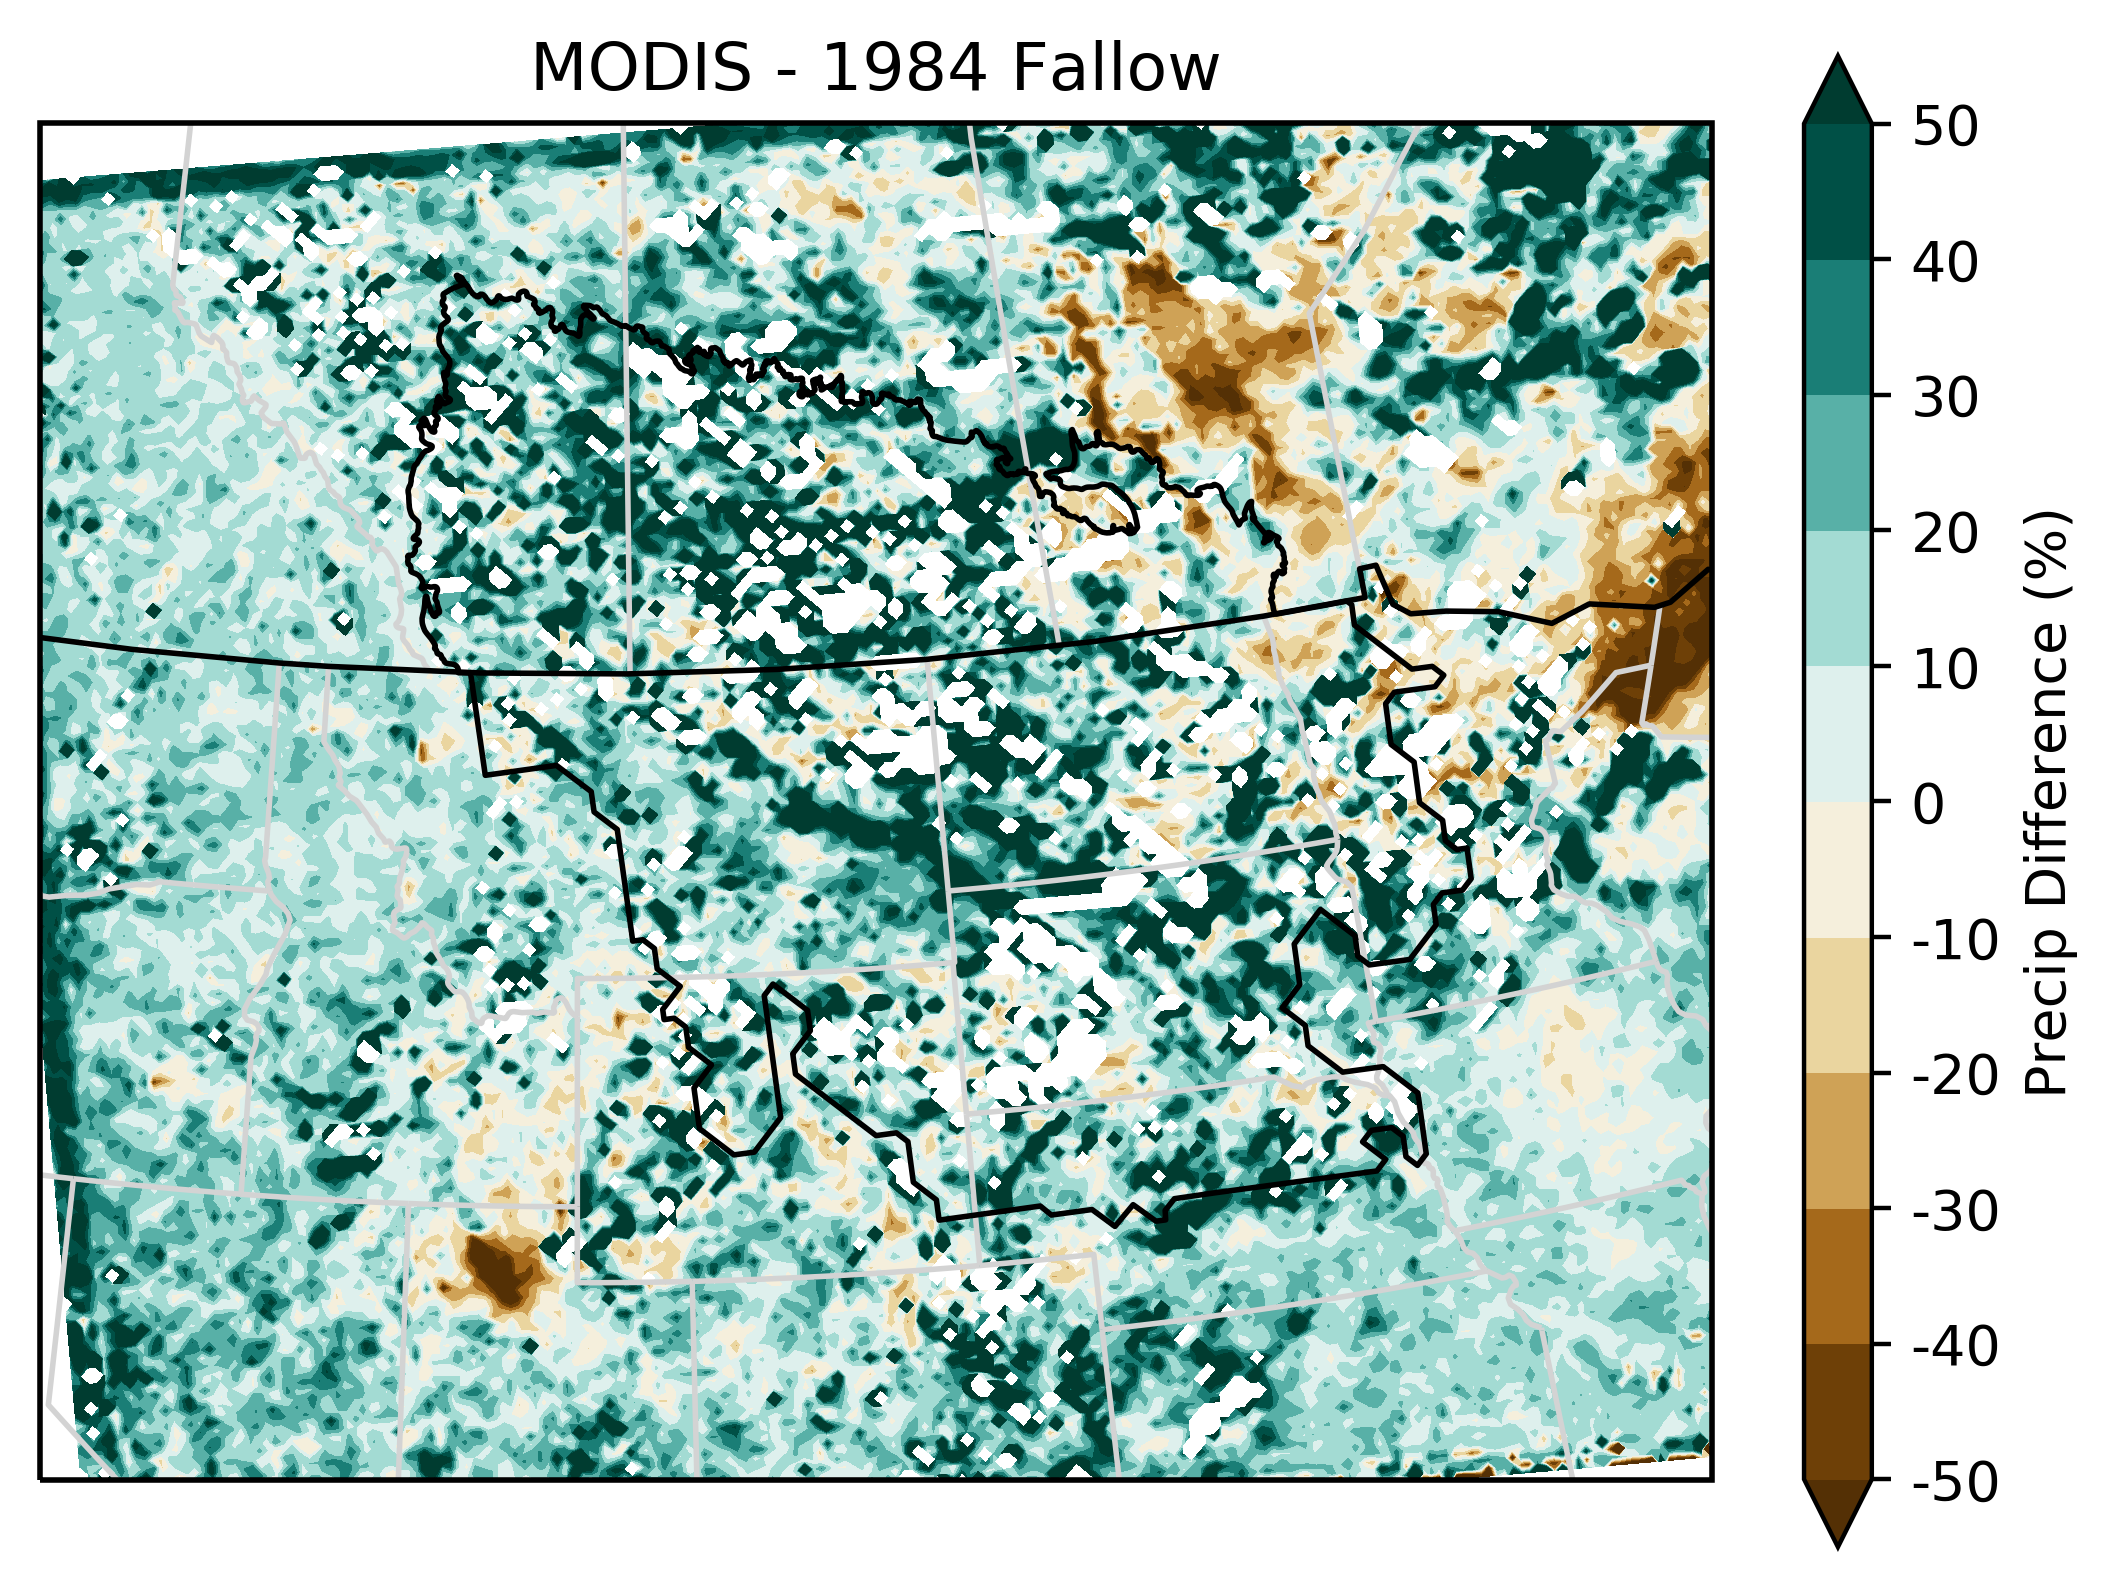

In [10]:

levs = [0.5,0.6,0.7,0.8,0.9,1,1.1,1.2,1.3,1.4,1.5]

fig = plt.figure(1,figsize=(13,7), dpi=400.0)
projection = ccrs.AlbersEqualArea(central_longitude=-111.0,central_latitude=47.0,false_easting=0.0, false_northing=0.0, standard_parallels=(40.0, 50.0), globe=None)
ax1 = plt.subplot(1,2,1, projection = projection)

plot = plt.contourf(diff_mj.XLONG,diff_mj.XLAT,diff_mj[:,:].values,transform=ccrs.PlateCarree(),levels=levs ,cmap='BrBG', extend='both')




ax1.set_extent([ext_e, ext_w, ext_s, ext_n])
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')
ax1.add_feature(states_provinces, edgecolor='lightgray')
ax1.add_feature(cfeature.COASTLINE)
ax1.add_feature(cfeature.BORDERS)
shape_feature = ShapelyFeature(Reader('/Users/gbromley/Dropbox/Montana_Climate_Project/Study_Area/NGP_Study_Area/Study_Area_08_01_17.shp').geometries(),crs=ccrs.PlateCarree(), facecolor='none',edgecolor='black')
ax1.add_feature(shape_feature)
#anchored_text = AnchoredText("b", loc=2)
#ax1.add_artist(anchored_text)

#ax1.title.set_visible(False)
ax1.set_title('MODIS - 1984 Fallow')
cb = plt.colorbar(plot, cmap='BrBG',fraction=0.037, ticks=[0.5,0.6,0.7,0.8,0.9,1,1.1,1.2,1.3,1.4,1.5])
cb.ax.set_yticklabels(['-50','-40','-30','-20','-10','0','10','20','30','40','50'])
cb.set_label(r'Precip Difference (%)',fontsize=10)


In [ ]:
months = [0,1,2,3,4,5,6,7,8,9,10,11]
for month in months:
    DIFF[month] = WRF.isel(XTIME=month) - CRU.isel(time=month)
